# 🐍 Лекция 2: Модель данных Python: всё — объект

<div style="background: linear-gradient(135deg, #6a11cb 0%, #2575fc 100%); padding: 20px; border-radius: 10px; color: white;">
  <h2 style="color: white;">Как устроен Python под капотом?</h2>
  <p>Сегодня мы заглянем внутрь Python и поймем, почему "всё есть объект" — не просто красивая фраза, а фундаментальный принцип языка.</p>
</div>

## 🎯 Цели лекции

✅ Понять, что такое "объект" в контексте Python  
✅ Разобраться с мутабельностью и иммутабельностью  
✅ Изучить ссылочную модель Python  
✅ Освоить пространства имён и области видимости  
✅ Научиться использовать `dir()`, `type()`, `id()` для интроспекции  

## 📊 План лекции

1. **Фундамент:** Всё в Python — объект
2. **Идентичность объектов:** `id()` и оператор `is`
3. **Мутабельность vs Иммутабельность**
4. **Ссылочная модель:** Как Python работает с памятью
5. **Пространства имён:** Локальные, глобальные, встроенные
6. **Интроспекция:** Изучение объектов изнутри
7. **Практика:** Когда что использовать

> 💡 **Ключевая идея:** В Python даже функции, модули и классы — это объекты!

In [ ]:
# Давайте проверим утверждение "всё есть объект"
print("🔍 Проверяем, что ВСЁ в Python — объект:\n")

# Числа — объекты
print(f"Число 42: type(42) = {type(42)}")

# Строки — объекты
print(f"Строка 'hello': type('hello') = {type('hello')}")

# Список — объект
print(f"Список [1, 2, 3]: type([1, 2, 3]) = {type([1, 2, 3])}")

# Функция — объект
def hello():
    return "Hello!"

print(f"Функция hello: type(hello) = {type(hello)}")

# Модуль — объект
import math
print(f"Модуль math: type(math) = {type(math)}")

# Класс — объект
class MyClass:
    pass

print(f"Класс MyClass: type(MyClass) = {type(MyClass)}")

# None — объект
print(f"None: type(None) = {type(None)}")

# Даже тип 'type' — это объект!
print(f"Тип type: type(type) = {type(type)}")
print(f"Это значит, что type — это экземпляр самого себя: type(type) is type = {type(type) is type}")

print("\n✅ Вывод: ДА, абсолютно всё в Python — объекты!")

## 🆔 Идентичность объектов: `id()` и оператор `is`

### Что такое идентичность объекта?
Каждый объект в Python имеет:
1. **Идентичность (identity)** — уникальный номер (адрес в памяти)
2. **Тип (type)** — что это за объект
3. **Значение (value)** — содержимое объекта

### Функция `id()`
Возвращает уникальный целочисленный идентификатор объекта. Обычно это адрес объекта в памяти.

### Оператор `is`
Проверяет, ссылаются ли две переменные на **один и тот же объект** в памяти.

### Оператор `==`
Проверяет, **равны ли значения** объектов (содержимое).

> ⚠️ **Важно:** `is` и `==` — это разные вещи! `is` проверяет идентичность, `==` проверяет равенство значений.

In [ ]:
# Разница между 'is' и '=='
print("🔍 Сравнение 'is' и '==':\n")

# Пример 1: Небольшие целые числа (Python кэширует малые числа)
a = 256
b = 256
print(f"a = 256, b = 256")
print(f"  a is b: {a is b}")      # True (Python кэширует числа от -5 до 256)
print(f"  a == b: {a == b}\n")    # True

# Пример 2: Большие целые числа (не кэшируются)
x = 1000
y = 1000
print(f"x = 1000, y = 1000")
print(f"  x is y: {x is y}")      # Может быть False в интерактивном режиме
print(f"  x == y: {x == y}\n")    # Всегда True

# Пример 3: Списки (всегда создаются новые объекты)
list1 = [1, 2, 3]
list2 = [1, 2, 3]
list3 = list1  # list3 ссылается на тот же объект, что и list1

print(f"list1 = [1, 2, 3], list2 = [1, 2, 3], list3 = list1")
print(f"  list1 is list2: {list1 is list2}")    # False - разные объекты
print(f"  list1 == list2: {list1 == list2}")    # True - одинаковые значения
print(f"  list1 is list3: {list1 is list3}")    # True - один и тот же объект
print(f"  id(list1): {id(list1)}")
print(f"  id(list2): {id(list2)}")
print(f"  id(list3): {id(list3)}")

# Пример 4: None - всегда один и тот же объект
print("\n✅ None всегда один и тот же объект:")
print(f"  None is None: {None is None}")
print(f"  id(None): {id(None)}")

# Когда использовать 'is'?
print("\n📝 Правила использования 'is':")
print("1. Всегда используйте 'is' для сравнения с None: if x is None")
print("2. Используйте 'is' для проверки синглтонов (True, False, None)")
print("3. Для сравнения значений используйте '=='")

## 🔄 Мутабельность vs Иммутабельность

### Что такое мутабельность?
**Мутабельный (изменяемый)** объект может быть изменен после создания без создания нового объекта.

**Иммутабельный (неизменяемый)** объект НЕ может быть изменен после создания. Любая "модификация" создает новый объект.

### Зачем это важно?
1. **Безопасность:** Иммутабельные объекты потокобезопасны
2. **Хешируемость:** Только иммутабельные объекты могут быть ключами словаря
3. **Производительность:** Python может кэшировать иммутабельные объекты

### Иммутабельные типы:
- `int`, `float`, `complex`
- `str`
- `tuple`
- `frozenset`
- `bytes`

### Мутабельные типы:
- `list`
- `dict`
- `set`
- `bytearray`
- Пользовательские классы (по умолчанию)

In [ ]:
# Демонстрация иммутабельности и мутабельности
print("🧪 Эксперименты с мутабельностью:\n")

# 1. ИММУТАБЕЛЬНЫЕ объекты: строки
print("1. Строки (иммутабельные):")
s1 = "Hello"
s2 = s1  # s2 ссылается на тот же объект

print(f"  До изменения: s1 = '{s1}', id(s1) = {id(s1)}")
print(f"                s2 = '{s2}', id(s2) = {id(s2)}")
print(f"  s1 is s2: {s1 is s2}")

# "Изменение" строки создает новый объект
s1 = s1 + " World!"
print(f"\n  После 'изменения': s1 = '{s1}', id(s1) = {id(s1)}")
print(f"                     s2 = '{s2}', id(s2) = {id(s2)}")
print(f"  s1 is s2: {s1 is s2}")  # False - разные объекты!

# 2. ИММУТАБЕЛЬНЫЕ объекты: кортежи
print("\n2. Кортежи (иммутабельные):")
t1 = (1, 2, [3, 4])  # Кортеж содержит мутабельный список!
print(f"  t1 = {t1}")
print(f"  Можно ли изменить список внутри кортежа? ДА!")

t1[2].append(5)  # Изменяем список внутри кортежа
print(f"  После t1[2].append(5): t1 = {t1}")
print(f"  Иммутабельность кортежа: нельзя изменить сам кортеж, но можно изменить мутабельные элементы внутри")

# 3. МУТАБЕЛЬНЫЕ объекты: списки
print("\n3. Списки (мутабельные):")
lst1 = [1, 2, 3]
lst2 = lst1  # Обе переменные ссылаются на один объект

print(f"  До изменения: lst1 = {lst1}, id(lst1) = {id(lst1)}")
print(f"                 lst2 = {lst2}, id(lst2) = {id(lst2)}")
print(f"  lst1 is lst2: {lst1 is lst2}")

# Изменение списка
lst1.append(4)
print(f"\n  После lst1.append(4):")
print(f"    lst1 = {lst1}, id(lst1) = {id(lst1)}")
print(f"    lst2 = {lst2}, id(lst2) = {id(lst2)}")
print(f"  lst1 is lst2: {lst1 is lst2}")  # True - все тот же объект!

# 4. Последствия мутабельности
print("\n4. Опасность мутабельных объектов по умолчанию:")
def add_to_list(item, my_list=[]):  # ОПАСНО! Значение по умолчанию создается один раз!
    my_list.append(item)
    return my_list

print("  Результаты вызова add_to_list():")
print(f"    add_to_list(1) = {add_to_list(1)}")
print(f"    add_to_list(2) = {add_to_list(2)}")  # Упс! Список сохранился!
print(f"    add_to_list(3) = {add_to_list(3)}")  # И снова!

# Правильный подход
print("\n  Правильный подход:")
def add_to_list_safe(item, my_list=None):
    if my_list is None:
        my_list = []
    my_list.append(item)
    return my_list

print(f"    add_to_list_safe(1) = {add_to_list_safe(1)}")
print(f"    add_to_list_safe(2) = {add_to_list_safe(2)}")  # Теперь правильно!
print(f"    add_to_list_safe(3) = {add_to_list_safe(3)}")

## 🎨 Визуализация мутабельности

Давайте создадим визуальное представление того, что происходит в памяти:

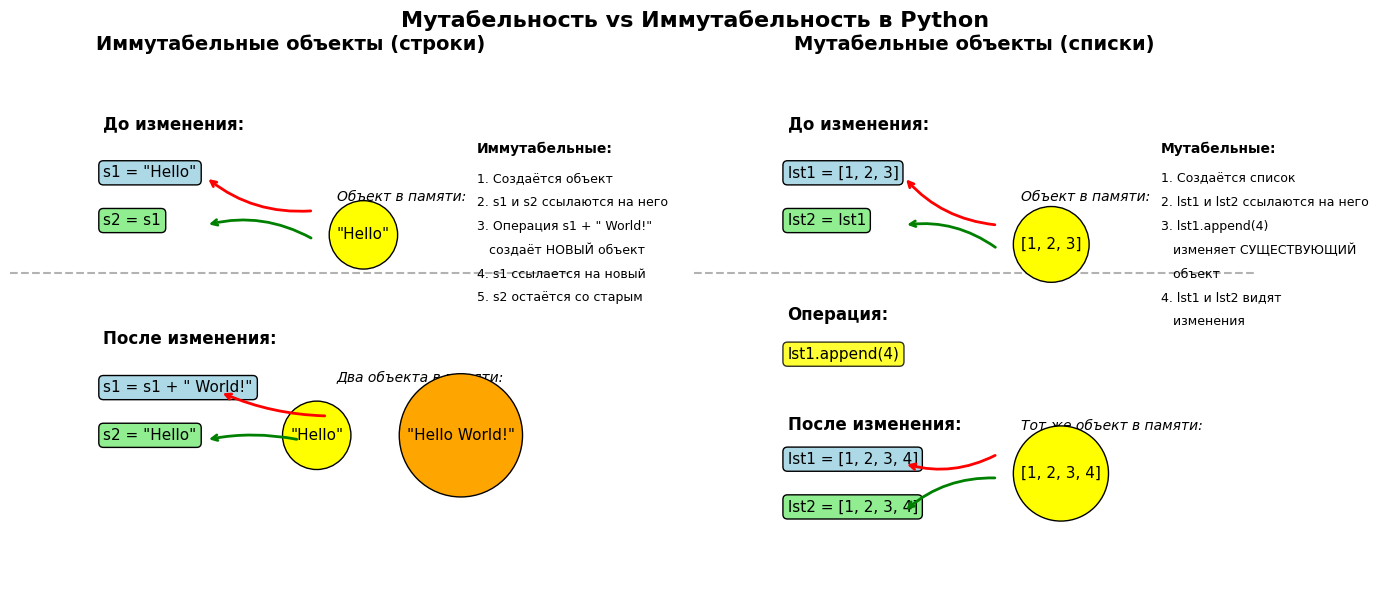

In [4]:
# Визуализируем разницу между иммутабельными и мутабельными объектами
import matplotlib.pyplot as plt
import numpy as np

# Создаем схематичное представление
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Иммутабельные объекты (строки)
ax1 = axes[0]
ax1.set_xlim(0, 12)
ax1.set_ylim(0, 11)
ax1.set_title('Иммутабельные объекты (строки)', fontsize=14, fontweight='bold')
ax1.axis('off')  # Отключаем оси для чистоты

# До изменения - наверху
ax1.text(2, 9.5, 'До изменения:', fontsize=12, fontweight='bold')
ax1.text(2, 8.5, 's1 = "Hello"', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
ax1.text(2, 7.5, 's2 = s1', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
ax1.text(7, 8, 'Объект в памяти:', fontsize=10, style='italic')
ax1.text(7, 7.2, '"Hello"', fontsize=11, bbox=dict(boxstyle="circle,pad=0.5", facecolor="yellow"))

# Стрелки ДО
ax1.annotate('', xy=(4.2, 8.5), xytext=(6.5, 7.8), 
             arrowprops=dict(arrowstyle='->', lw=2, color='red', connectionstyle="arc3,rad=-0.2"))
ax1.annotate('', xy=(4.2, 7.5), xytext=(6.5, 7.2), 
             arrowprops=dict(arrowstyle='->', lw=2, color='green', connectionstyle="arc3,rad=0.2"))

# Разделительная линия
ax1.plot([0, 12], [6.5, 6.5], 'k--', alpha=0.3)

# После изменения - внизу
ax1.text(2, 5, 'После изменения:', fontsize=12, fontweight='bold')
ax1.text(2, 4, 's1 = s1 + " World!"', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
ax1.text(2, 3, 's2 = "Hello"', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
ax1.text(7, 4.2, 'Два объекта в памяти:', fontsize=10, style='italic')
ax1.text(6, 3, '"Hello"', fontsize=11, bbox=dict(boxstyle="circle,pad=0.5", facecolor="yellow"))
ax1.text(8.5, 3, '"Hello World!"', fontsize=11, bbox=dict(boxstyle="circle,pad=0.5", facecolor="orange"))

# Стрелки ПОСЛЕ
ax1.annotate('', xy=(4.5, 4), xytext=(6.8, 3.5), 
             arrowprops=dict(arrowstyle='->', lw=2, color='red', connectionstyle="arc3,rad=-0.1"))
ax1.annotate('', xy=(4.2, 3), xytext=(6.2, 3), 
             arrowprops=dict(arrowstyle='->', lw=2, color='green', connectionstyle="arc3,rad=0.1"))

# Объяснение справа
ax1.text(10, 9, 'Иммутабельные:', fontsize=10, fontweight='bold')
ax1.text(10, 8.4, '1. Создаётся объект', fontsize=9)
ax1.text(10, 7.9, '2. s1 и s2 ссылаются на него', fontsize=9)
ax1.text(10, 7.4, '3. Операция s1 + " World!"', fontsize=9)
ax1.text(10, 6.9, '   создаёт НОВЫЙ объект', fontsize=9)
ax1.text(10, 6.4, '4. s1 ссылается на новый', fontsize=9)
ax1.text(10, 5.9, '5. s2 остаётся со старым', fontsize=9)

# 2. Мутабельные объекты (списки)
ax2 = axes[1]
ax2.set_xlim(0, 12)
ax2.set_ylim(0, 11)
ax2.set_title('Мутабельные объекты (списки)', fontsize=14, fontweight='bold')
ax2.axis('off')  # Отключаем оси для чистоты

# До изменения - наверху
ax2.text(2, 9.5, 'До изменения:', fontsize=12, fontweight='bold')
ax2.text(2, 8.5, 'lst1 = [1, 2, 3]', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
ax2.text(2, 7.5, 'lst2 = lst1', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
ax2.text(7, 8, 'Объект в памяти:', fontsize=10, style='italic')
ax2.text(7, 7, '[1, 2, 3]', fontsize=11, bbox=dict(boxstyle="circle,pad=0.5", facecolor="yellow"))

# Стрелки ДО
ax2.annotate('', xy=(4.5, 8.5), xytext=(6.5, 7.5), 
             arrowprops=dict(arrowstyle='->', lw=2, color='red', connectionstyle="arc3,rad=-0.2"))
ax2.annotate('', xy=(4.5, 7.5), xytext=(6.5, 7), 
             arrowprops=dict(arrowstyle='->', lw=2, color='green', connectionstyle="arc3,rad=0.2"))

# Разделительная линия
ax2.plot([0, 12], [6.5, 6.5], 'k--', alpha=0.3)

# Операция изменения
ax2.text(2, 5.5, 'Операция:', fontsize=12, fontweight='bold')
ax2.text(2, 4.7, 'lst1.append(4)', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

# После изменения - внизу
ax2.text(2, 3.2, 'После изменения:', fontsize=12, fontweight='bold')
ax2.text(2, 2.5, 'lst1 = [1, 2, 3, 4]', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
ax2.text(2, 1.5, 'lst2 = [1, 2, 3, 4]', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
ax2.text(7, 3.2, 'Тот же объект в памяти:', fontsize=10, style='italic')
ax2.text(7, 2.2, '[1, 2, 3, 4]', fontsize=11, bbox=dict(boxstyle="circle,pad=0.5", facecolor="yellow"))

# Стрелки ПОСЛЕ
ax2.annotate('', xy=(4.5, 2.5), xytext=(6.5, 2.7), 
             arrowprops=dict(arrowstyle='->', lw=2, color='red', connectionstyle="arc3,rad=-0.2"))
ax2.annotate('', xy=(4.5, 1.5), xytext=(6.5, 2.2), 
             arrowprops=dict(arrowstyle='->', lw=2, color='green', connectionstyle="arc3,rad=0.2"))

# Объяснение справа
ax2.text(10, 9, 'Мутабельные:', fontsize=10, fontweight='bold')
ax2.text(10, 8.4, '1. Создаётся список', fontsize=9)
ax2.text(10, 7.9, '2. lst1 и lst2 ссылаются на него', fontsize=9)
ax2.text(10, 7.4, '3. lst1.append(4)', fontsize=9)
ax2.text(10, 6.9, '   изменяет СУЩЕСТВУЮЩИЙ', fontsize=9)
ax2.text(10, 6.4, '   объект', fontsize=9)
ax2.text(10, 5.9, '4. lst1 и lst2 видят', fontsize=9)
ax2.text(10, 5.4, '   изменения', fontsize=9)

# Общая легенда
fig.suptitle('Мутабельность vs Иммутабельность в Python', fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Делаем место для заголовка
plt.show()

## 🔗 Ссылочная модель Python

### Как Python работает с памятью?
В Python переменные — это **ссылки** (указатели) на объекты в памяти, а не "ящики" со значениями.

### Ключевые принципы:
1. **Переменные хранят ссылки**, а не значения
2. **Присваивание** копирует ссылку, а не объект
3. **Параметры функций** передаются по ссылке

### Последствия:
- Две переменные могут ссылаться на один объект
- Изменение мутабельного объекта через одну переменную видно через другую
- Для создания копии объекта нужно использовать явное копирование

In [ ]:
# Демонстрация ссылочной модели
print("🔗 Ссылочная модель Python:\n")

# 1. Простое присваивание
print("1. Простое присваивание:")
a = [1, 2, 3]
b = a  # b ссылается на тот же объект, что и a
print(f"  a = [1, 2, 3]; b = a")
print(f"  a is b: {a is b}")
print(f"  Изменяем b[0] = 99")
b[0] = 99
print(f"  Теперь a = {a}")  # a тоже изменился!

# 2. Поверхностное копирование (shallow copy)
print("\n2. Поверхностное копирование:")
import copy

original = [1, 2, [3, 4]]
shallow_copy = copy.copy(original)  # или original.copy() для списков

print(f"  original = {original}")
print(f"  shallow_copy = {shallow_copy}")
print(f"  original is shallow_copy: {original is shallow_copy}")  # False
print(f"  original[2] is shallow_copy[2]: {original[2] is shallow_copy[2]}")  # True!

# Изменяем вложенный список
print(f"\n  Изменяем original[2].append(5):")
original[2].append(5)
print(f"  original = {original}")
print(f"  shallow_copy = {shallow_copy}")  # Упс! shallow_copy тоже изменился!

# 3. Глубокое копирование (deep copy)
print("\n3. Глубокое копирование:")
deep_copy = copy.deepcopy(original)
print(f"  original = {original}")
print(f"  deep_copy = {deep_copy}")
print(f"  original is deep_copy: {original is deep_copy}")  # False
print(f"  original[2] is deep_copy[2]: {original[2] is deep_copy[2]}")  # False!

print(f"\n  Изменяем original[2].append(6):")
original[2].append(6)
print(f"  original = {original}")
print(f"  deep_copy = {deep_copy}")  # Теперь deep_copy не изменился!

# 4. Особый случай: оператор умножения для списков
print("\n4. Опасность оператора умножения для списков:")
matrix = [[0] * 3] * 3  # ОПАСНО! Создает 3 ссылки на один список!
print(f"  matrix = [[0] * 3] * 3")
print(f"  matrix = {matrix}")

matrix[0][0] = 1  # Изменяем только первый элемент?
print(f"\n  После matrix[0][0] = 1:")
print(f"  matrix = {matrix}")  # Упс! Изменились все строки!

# Правильный способ
print("\n  Правильный способ:")
matrix_correct = [[0] * 3 for _ in range(3)]
print(f"  matrix_correct = [[0] * 3 for _ in range(3)]")
print(f"  matrix_correct = {matrix_correct}")

matrix_correct[0][0] = 1
print(f"\n  После matrix_correct[0][0] = 1:")
print(f"  matrix_correct = {matrix_correct}")  # Теперь правильно!

## 🗺️ Пространства имён и области видимости

### Что такое пространство имён?
**Пространство имён (namespace)** — это отображение имён на объекты. Это словарь, где ключи — имена переменных, а значения — объекты.

### Уровни пространств имён в Python:
1. **Локальное (local)** — внутри функции
2. **Объемлющее (enclosing)** — в объемлющих функциях (для вложенных функций)
3. **Глобальное (global)** — на уровне модуля
4. **Встроенное (built-in)** — встроенные функции и исключения

### Правило LEGB (Local, Enclosing, Global, Built-in)
Python ищет переменные в таком порядке. Это называется **разрешением имён**.

### Ключевые слова:
- `global` — использовать глобальную переменную
- `nonlocal` — использовать переменную из объемлющей функции

In [3]:
# Демонстрация пространств имён и областей видимости
print("🗺️ Пространства имён и области видимости:\n")

# Глобальная переменная
global_var = "Я глобальная"

print(f"Глобальная переменная: global_var = '{global_var}'")

# Функция с локальной переменной
def test_scope():
    local_var = "Я локальная"
    print(f"  Внутри функции: local_var = '{local_var}'")
    print(f"  Внутри функции можно читать глобальную: global_var = '{global_var}'")

test_scope()

# Попытка доступа к локальной переменной снаружи
try:
    print(f"Снаружи функции: local_var = {local_var}")
except NameError as e:
    print(f"Ошибка при доступе к local_var снаружи: {e}")

# Изменение глобальной переменной из функции
print("\n📝 Изменение глобальной переменной:")
def modify_global():
    global global_var  # Говорим Python, что хотим использовать глобальную переменную
    global_var = "Я изменена из функции"
    new_local = "Я новая локальная"
    print(f"  Внутри функции: global_var = '{global_var}'")

print(f"До вызова функции: global_var = '{global_var}'")
modify_global()
print(f"После вызова функции: global_var = '{global_var}'")

# Вложенные функции и nonlocal
print("\n🔗 Вложенные функции и nonlocal:")
def outer():
    outer_var = "Я во внешней функции"
    
    def inner():
        nonlocal outer_var  # Используем переменную из объемлющей функции
        outer_var = "Я изменена из внутренней функции"
        inner_var = "Я во внутренней функции"
        print(f"    Во внутренней функции: outer_var = '{outer_var}'")
        print(f"    Во внутренней функции: inner_var = '{inner_var}'")
    
    print(f"  До вызова inner: outer_var = '{outer_var}'")
    inner()
    print(f"  После вызова inner: outer_var = '{outer_var}'")
    # print(f"  inner_var из outer: {inner_var}")  # Ошибка!

outer()

# Доступ к пространствам имён
print("\n🔍 Доступ к пространствам имён:")

# Локальные переменные функции
def sample_function(x, y):
    local_var = "test"
    print(f"  Локальные переменные функции: {locals()}")

sample_function(10, 20)

# Глобальные переменные модуля
print(f"\n  Глобальные переменные модуля:")
print(f"  globals() keys (первые 10): {list(globals().keys())[:10]}")

# Встроенные имена
import builtins
print(f"\n  Встроенные имена (первые 10): {dir(builtins)[:10]}")

# Пример конфликта имён
print("\n⚠️ Пример конфликта имён:")
def sum(numbers):  # Переопределяем встроенную функцию sum!
    print(f"  Вызвана наша функция sum")
    total = 0
    for n in numbers:
        total += n
    return total

# Используем нашу функцию
result = sum([1, 2, 3])
print(f"  sum([1, 2, 3]) = {result}")

# Чтобы использовать встроенную sum, нужно обратиться через builtins
print(f"  Встроенная sum: {builtins.sum([1, 2, 3])}")

# Восстанавливаем оригинальную sum
sum = builtins.sum
print(f"\n  Восстановили встроенную sum: sum([1, 2, 3]) = {sum([1, 2, 3])}")

🗺️ Пространства имён и области видимости:

Глобальная переменная: global_var = 'Я глобальная'
  Внутри функции: local_var = 'Я локальная'
  Внутри функции можно читать глобальную: global_var = 'Я глобальная'
Ошибка при доступе к local_var снаружи: name 'local_var' is not defined

📝 Изменение глобальной переменной:
До вызова функции: global_var = 'Я глобальная'
  Внутри функции: global_var = 'Я изменена из функции'
После вызова функции: global_var = 'Я изменена из функции'

🔗 Вложенные функции и nonlocal:
  До вызова inner: outer_var = 'Я во внешней функции'
    Во внутренней функции: outer_var = 'Я изменена из внутренней функции'
    Во внутренней функции: inner_var = 'Я во внутренней функции'
  После вызова inner: outer_var = 'Я изменена из внутренней функции'

🔍 Доступ к пространствам имён:
  Локальные переменные функции: {'x': 10, 'y': 20, 'local_var': 'test'}

  Глобальные переменные модуля:
  globals() keys (первые 10): ['__name__', '__doc__', '__package__', '__loader__', '__spec_

## 🔬 Интроспекция: изучение объектов изнутри

**Интроспекция** — возможность программы исследовать тип и свойства объектов во время выполнения.

### Основные инструменты интроспекции:
1. **`type(obj)`** — возвращает тип объекта
2. **`id(obj)`** — возвращает уникальный идентификатор объекта
3. **`dir(obj)`** — возвращает список атрибутов и методов объекта
4. **`isinstance(obj, class)`** — проверяет, является ли объект экземпляром класса
5. **`issubclass(cls1, cls2)`** — проверяет, является ли класс подклассом другого
6. **`hasattr(obj, name)`** — проверяет, имеет ли объект атрибут
7. **`getattr(obj, name, default)`** — получает атрибут объекта
8. **`callable(obj)`** — проверяет, можно ли вызвать объект

### Зачем нужна интроспекция?
- Отладка и исследование кода
- Динамическое создание и модификация объектов
- Реализация плагинов и расширений
- Тестирование и документация

In [ ]:
# Практика с инструментами интроспекции
print("🔬 Инструменты интроспекции в действии:\n")

# Создадим сложный объект для исследования
class Animal:
    """Базовый класс животных."""
    
    def __init__(self, name):
        self.name = name
        self._age = 0
    
    def speak(self):
        return "Some sound"
    
    def get_age(self):
        return self._age


class Dog(Animal):
    """Класс собаки."""
    
    def __init__(self, name, breed):
        super().__init__(name)
        self.breed = breed
        self.tricks = []
    
    def speak(self):
        return "Woof!"
    
    def add_trick(self, trick):
        self.tricks.append(trick)


# Создаем объект
my_dog = Dog("Бобик", "Дворняжка")
my_dog.add_trick("Сидеть")
my_dog.add_trick("Лежать")

# 1. type() - получение типа объекта
print("1. Функция type():")
print(f"  type(my_dog) = {type(my_dog)}")
print(f"  type(Dog) = {type(Dog)}")
print(f"  type(type) = {type(type)}")  # Мета-мета-класс!

# 2. id() - уникальный идентификатор
print(f"\n2. Функция id():")
print(f"  id(my_dog) = {id(my_dog)}")
print(f"  id(my_dog) в hex: {hex(id(my_dog))}")

# 3. dir() - список атрибутов и методов
print(f"\n3. Функция dir():")
print(f"  dir(my_dog) (первые 15): {dir(my_dog)[:15]}")
print(f"  dir(Dog) (первые 10): {dir(Dog)[:10]}")

# Более читаемый вывод dir
print(f"\n  Методы и атрибуты my_dog:")
for attr in dir(my_dog):
    if not attr.startswith('__'):  # Пропускаем служебные методы
        obj = getattr(my_dog, attr)
        print(f"    {attr}: {type(obj).__name__}")

# 4. isinstance() - проверка типа
print(f"\n4. Функция isinstance():")
print(f"  isinstance(my_dog, Dog): {isinstance(my_dog, Dog)}")
print(f"  isinstance(my_dog, Animal): {isinstance(my_dog, Animal)}")
print(f"  isinstance(my_dog, object): {isinstance(my_dog, object)}")
print(f"  isinstance(Dog, type): {isinstance(Dog, type)}")

# 5. issubclass() - проверка наследования
print(f"\n5. Функция issubclass():")
print(f"  issubclass(Dog, Animal): {issubclass(Dog, Animal)}")
print(f"  issubclass(Dog, object): {issubclass(Dog, object)}")
print(f"  issubclass(Animal, Dog): {issubclass(Animal, Dog)}")

# 6. hasattr(), getattr(), setattr()
print(f"\n6. Работа с атрибутами:")
print(f"  hasattr(my_dog, 'name'): {hasattr(my_dog, 'name')}")
print(f"  hasattr(my_dog, 'color'): {hasattr(my_dog, 'color')}")

print(f"  getattr(my_dog, 'name'): {getattr(my_dog, 'name')}")
print(f"  getattr(my_dog, 'color', 'Неизвестно'): {getattr(my_dog, 'color', 'Неизвестно')}")

setattr(my_dog, 'color', 'Коричневый')
print(f"  После setattr(my_dog, 'color', 'Коричневый'):")
print(f"  my_dog.color = {my_dog.color}")

# 7. callable() - проверка, можно ли вызвать
print(f"\n7. Функция callable():")
print(f"  callable(my_dog): {callable(my_dog)}")
print(f"  callable(my_dog.speak): {callable(my_dog.speak)}")
print(f"  callable(my_dog.name): {callable(my_dog.name)}")

# 8. __dict__ - словарь атрибутов объекта
print(f"\n8. Атрибут __dict__:")
print(f"  my_dog.__dict__ = {my_dog.__dict__}")
print(f"  Dog.__dict__ keys: {list(Dog.__dict__.keys())}")

# 9. __class__ - класс объекта
print(f"\n9. Атрибут __class__:")
print(f"  my_dog.__class__ = {my_dog.__class__}")
print(f"  my_dog.__class__.__name__ = {my_dog.__class__.__name__}")

# 10. Модуль, к которому принадлежит объект
print(f"\n10. Модуль объекта:")
print(f"  my_dog.__module__ = {my_dog.__module__}")
print(f"  Dog.__module__ = {Dog.__module__}")

In [ ]:
# Практические примеры использования интроспекции
print("🚀 Практическое применение интроспекции:\n")

# 1. Динамический вызов методов по имени
print("1. Динамический вызов методов:")

class Calculator:
    def add(self, a, b):
        return a + b
    
    def multiply(self, a, b):
        return a * b
    
    def power(self, a, b):
        return a ** b

calc = Calculator()

# Допустим, операция приходит извне (от пользователя, из файла и т.д.)
operation_name = "multiply"
args = (5, 3)

if hasattr(calc, operation_name) and callable(getattr(calc, operation_name)):
    method = getattr(calc, operation_name)
    result = method(*args)
    print(f"  calc.{operation_name}{args} = {result}")
else:
    print(f"  Операция '{operation_name}' не найдена")

# 2. Автоматическое документирование класса
print("\n2. Автоматическое документирование:")

def document_class(cls):
    """Генерирует документацию для класса."""
    print(f"Класс: {cls.__name__}")
    
    if cls.__doc__:
        print(f"Описание: {cls.__doc__.strip()}")
    
    print("\nМетоды:")
    for name in dir(cls):
        if not name.startswith('_'):
            attr = getattr(cls, name)
            if callable(attr):
                print(f"  - {name}()")
    
    print("\nАтрибуты класса:")
    for key, value in cls.__dict__.items():
        if not key.startswith('_') and not callable(value):
            print(f"  - {key} = {value}")

document_class(Calculator)

# 3. Проверка интерфейса объекта (утиная типизация)
print("\n3. Проверка интерфейса (утиная типизация):")

def check_interface(obj, required_methods):
    """Проверяет, имеет ли объект необходимые методы."""
    missing = []
    for method in required_methods:
        if not hasattr(obj, method) or not callable(getattr(obj, method)):
            missing.append(method)
    
    if missing:
        raise TypeError(f"Объект не поддерживает методы: {missing}")
    return True

# Класс, который выглядит как итератор
class FakeIterator:
    def __iter__(self):
        return self
    
    # Нет метода __next__!

try:
    check_interface(FakeIterator(), ['__iter__', '__next__'])
    print("  Объект соответствует интерфейсу итератора")
except TypeError as e:
    print(f"  Ошибка: {e}")

# 4. Плагинная архитектура
print("\n4. Пример плагинной архитектуры:")

# Динамическая загрузка классов из модуля
import types

# Создаем простую систему плагинов
class PluginBase:
    def execute(self):
        raise NotImplementedError

class PluginA(PluginBase):
    def execute(self):
        return "Плагин A выполнен"

class PluginB(PluginBase):
    def execute(self):
        return "Плагин B выполнен"

# Динамическое обнаружение плагинов
def discover_plugins():
    plugins = []
    
    # Ищем все классы в текущем пространстве имен
    for name, obj in globals().items():
        if (isinstance(obj, type) and 
            issubclass(obj, PluginBase) and 
            obj != PluginBase):
            plugins.append(obj())
    
    return plugins

plugins = discover_plugins()
print(f"  Найдено плагинов: {len(plugins)}")
for i, plugin in enumerate(plugins, 1):
    print(f"  Плагин {i}: {plugin.execute()}")

## 📚 Итоги лекции

### Ключевые понятия:
1. **Всё есть объект** — числа, строки, функции, классы, модули
2. **Идентичность vs Равенство** — `is` проверяет тот же объект, `==` проверяет одинаковые значения
3. **Мутабельность** — изменяемые объекты (списки, словари) vs неизменяемые (строки, кортежи)
4. **Ссылочная модель** — переменные хранят ссылки на объекты, а не сами объекты
5. **Пространства имён** — локальные, объемлющие, глобальные, встроенные (LEGB)
6. **Интроспекция** — изучение объектов во время выполнения

### 🎯 Практические советы:

#### 1. Когда использовать `is` vs `==`:
```python
# Всегда используйте 'is' для синглтонов
if x is None:
if x is True:
if x is False:

# Для сравнения значений используйте '=='
if x == 10:
if name == "Python":

In [ ]:
# Опасность: изменяемые значения по умолчанию
def bad_func(items=[]):  # НЕ ДЕЛАЙТЕ ТАК!
    items.append(1)
    return items

def good_func(items=None):  # ДЕЛАЙТЕ ТАК!
    if items is None:
        items = []
    items.append(1)
    return items

In [ ]:
import copy

# Поверхностное копирование (только верхний уровень)
shallow = copy.copy(original)

# Глубокое копирование (все уровни)
deep = copy.deepcopy(original)

In [ ]:
# Изменение глобальной переменной
x = 10

def func():
    global x
    x = 20

# Изменение переменной объемлющей функции
def outer():
    y = 10
    
    def inner():
        nonlocal y
        y = 20

In [ ]:
# Быстрая проверка понимания материала
print("📝 Проверка понимания лекции 2\n")

questions = [
    {
        "question": "1. Что вернёт выражение: 'Python' is 'Python'?",
        "options": ["A) Всегда True", "B) Всегда False", "C) Зависит от реализации"],
        "answer": "C",
        "explanation": "Строки могут кэшироваться интерпретатором, но не гарантируется"
    },
    {
        "question": "2. Что опасного в функции: def f(x, items=[]): ...?",
        "options": [
            "A) Ничего",
            "B) Значение по умолчанию создается один раз",
            "C) Список items будет общим для всех вызовов"
        ],
        "answer": "BC",
        "explanation": "Значение по умолчанию вычисляется один раз при определении функции"
    },
    {
        "question": "3. Как правильно проверить, что переменная равна None?",
        "options": ["A) if x == None", "B) if x is None", "C) if not x"],
        "answer": "B",
        "explanation": "Всегда используйте 'is' для сравнения с None, True, False"
    },
    {
        "question": "4. Что выведет код: a = [1, 2]; b = a; b += [3]; print(a)?",
        "options": ["A) [1, 2]", "B) [1, 2, 3]", "C) Ошибка"],
        "answer": "B",
        "explanation": "b и a ссылаются на один объект, изменение b меняет a"
    },
    {
        "question": "5. В каком порядке Python ищет переменные (правило LEGB)?",
        "options": [
            "A) Local → Global → Enclosing → Built-in",
            "B) Local → Enclosing → Global → Built-in", 
            "C) Built-in → Global → Enclosing → Local"
        ],
        "answer": "B",
        "explanation": "Local → Enclosing → Global → Built-in"
    }
]

score = 0
for i, q in enumerate(questions, 1):
    print(f"{q['question']}")
    for opt in q['options']:
        print(f"  {opt}")
    
    # Эмулируем проверку ответов
    print(f"Ответ: {q['answer']}")
    print(f"Объяснение: {q['explanation']}\n")
    score += 1

print(f"🎉 Ваш результат: {score}/{len(questions)}")
if score == len(questions):
    print("Отлично! Вы прекрасно поняли материал!")
else:
    print("Есть над чем поработать. Пересмотрите сложные моменты.")

### 🚀 Что дальше?

На следующей лекции:
- **Классы и объекты** — создание собственных типов данных
- **Методы и атрибуты** — поведение и состояние объектов
- **Конструктор `__init__`** — инициализация объектов
- **Сравнение с C++** — как ООП в Python отличается от C++

### 📖 Рекомендуемая литература:
1. [Python Documentation: Data Model](https://docs.python.org/3/reference/datamodel.html)
2. [Fluent Python, Chapter 8: Object References, Mutability and Recycling](https://www.oreilly.com/library/view/fluent-python/9781491946237/)
3. [Python's "is" operator: behavior with immutable types](https://stackoverflow.com/questions/13650293/)
```

---
